<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/Light_%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F_%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%22%D0%A1%D0%B0%D1%84%D0%BE%D0%BD%D0%BE%D0%B2_%D0%90_%D0%90_MNIST_%D1%86%D0%B8%D1%84%D1%80%D1%8B_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт **библиотек**

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

**Загрузка базы mnist.**

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных MNist

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Объединил обучающую и тестовую выборку  создал общий массив
all_x = np.concatenate([x_train_org, x_test_org])
all_x.shape
#Объеденил правильные ответы обучающей и тестовой выборке
all_y = np.concatenate([y_train_org, y_test_org])
all_y.shape

(70000,)

#Обучающая выборка 50.000 примеров


In [ ]:
train = int(input("Введите размер обучающей выборки чилос до 70 000: "))
x_train =all_x[:train]
print('Размер обучающей выборки: ',x_train.shape)


x_test = all_x[:(all_y.size -train)]
print('Размер тестовой выборки: ',x_test.shape)


y_train = all_y[:train] 
print('Правильные ответы для обучающей выборки (размерность): ',y_train.shape)

# правильные ответы для тестовой выборки
y_test = all_y[:(all_y.size -train)] 
print('Правильные ответы для тестовой выборки (размерность): ' ,y_test.shape)

#Нормирование x_train и x_test
x_train = x_train.reshape(y_train.size, 784)
x_test  = x_test.reshape(all_y.size - y_train.size, 784)

# Преобразуем y_train и y_test ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 10)
y_test  = utils.to_categorical(y_test, 10)


Введите размер обучающей выборки чилос до 70 000: 50000
Размер обучающей выборки:  (50000, 28, 28)
Размер тестовой выборки:  (20000, 28, 28)
Правильные ответы для обучающей выборки (размерность):  (50000,)
Правильные ответы для тестовой выборки (размерность):  (20000,)


**Создание нейронной сети**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
50/50 [==============================] - 0s 7ms/step - loss: 1.2690 - accuracy: 0.6683 - val_loss: 0.3852 - val_accuracy: 0.8939
Epoch 2/150
50/50 [==============================] - 0s 4ms/step - loss: 0.3483 - accuracy: 0.9014 - val_loss: 0.3117 - val_accuracy: 0.9076
Epoch 3/150
50/50 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0

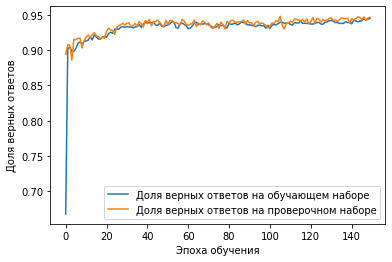

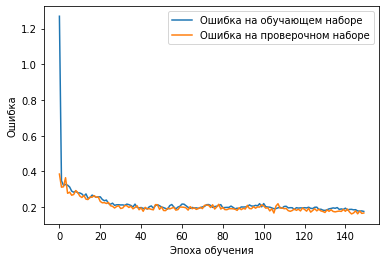

In [ ]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="sigmoid")) # Добавляем полносвязный слой на 800 нейронов с активацией
#model.add(Dropout(0.7))
#model.add(BatchNormalization())
model.add(Dense(400, activation="sigmoid")) # Добавляем полносвязный слой на 400 нейронов с активацией
#model.add(Dropout(0.7))
#model.add(BatchNormalization())

model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"]) # Компилируем модель
#model.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
print(model.summary()) #Вывод структуры модели



#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
history = model.fit(x_train, # массив цифр от 1 до 9 для обучения
                    y_train, # правильные ответы для обучения
                    batch_size=1000,
                    validation_data=(x_test,  # массив цифр от 1 до 9 для проветки
                                     y_test), # правльные ответы для обучения (1-9 цифры)
                    epochs=150,
                    verbose=1)

# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Вывод модель данных 50 тыс. обуч. на 10 тыс. тест.: loss: 0.1760 > val_loss: 0.1671 - Переобучения, нет

# Обучающая выборка 10.000 примеров


In [ ]:
train = int(input("Введите размер обучающей выборки чилос до 70 000: "))
x_train =all_x[:train]
print('Размер обучающей выборки: ',x_train.shape)


x_test = all_x[:(all_y.size -train)]
print('Размер тестовой выборки: ',x_test.shape)


y_train = all_y[:train] 
print('Правильные ответы для обучающей выборки (размерность): ',y_train.shape)

# правильные ответы для тестовой выборки
y_test = all_y[:(all_y.size -train)] 
print('Правильные ответы для тестовой выборки (размерность): ' ,y_test.shape)

#Нормирование x_train и x_test
x_train = x_train.reshape(y_train.size, 784)
x_test  = x_test.reshape(all_y.size - y_train.size, 784)

# Преобразуем y_train и y_test ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 10)
y_test  = utils.to_categorical(y_test, 10)

Введите размер обучающей выборки чилос до 70 000: 10000
Размер обучающей выборки:  (10000, 28, 28)
Размер тестовой выборки:  (60000, 28, 28)
Правильные ответы для обучающей выборки (размерность):  (10000,)
Правильные ответы для тестовой выборки (размерность):  (60000,)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
10/10 [==============================] - 0s 27ms/step - loss: 2.6473 - accuracy: 0.3738 - val_loss: 1.1388 - val_accuracy: 0.6532
Epoch 2/150
10/10 [==============================] - 0s 17ms/step - loss: 0.8095 - accuracy: 0.7656 - val_loss: 0.6057 - val_accuracy: 0.8220
Epoch 3/150
10/10 [==============================] - 0s 17ms/step - loss: 0.4993 - accura

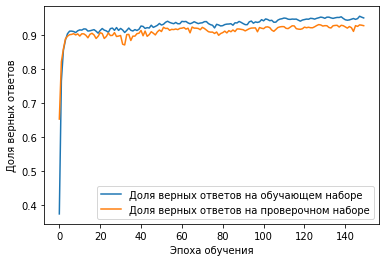

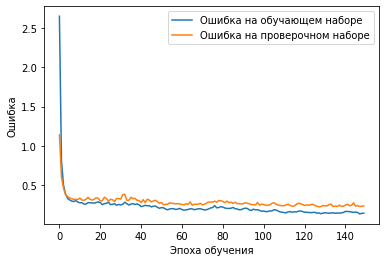

In [ ]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="sigmoid")) # Добавляем полносвязный слой на 800 нейронов с активацией
model.add(Dense(400, activation="sigmoid")) # Добавляем полносвязный слой на 400 нейронов с активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели



#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
history = model.fit(x_train, # массив цифр от 1 до 9 для обучения
                    y_train, # правильные ответы для обучения
                    batch_size=1000,
                    validation_data=(x_test,  # массив цифр от 1 до 9 для проветки
                                     y_test), # правльные ответы для обучения (1-9 цифры)
                    epochs=150,
                    verbose=1)

# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Вывод 10 000 обуч. на 50 000. тест: loss: 0.1431 < val_loss: 0.2368 / Возникает переобучение, на тестовой базе ошибка увеличивается, на обучающей падает

#Обучающая выборка 500 примеров

In [ ]:
train = int(input("Введите размер обучающей выборки чилос до 70 000: "))
x_train =all_x[:train]
print('Размер обучающей выборки: ',x_train.shape)


x_test = all_x[:(all_y.size -train)]
print('Размер тестовой выборки: ',x_test.shape)


y_train = all_y[:train] 
print('Правильные ответы для обучающей выборки (размерность): ',y_train.shape)

# правильные ответы для тестовой выборки
y_test = all_y[:(all_y.size -train)] 
print('Правильные ответы для тестовой выборки (размерность): ' ,y_test.shape)

#Нормирование x_train и x_test
x_train = x_train.reshape(y_train.size, 784)
x_test  = x_test.reshape(all_y.size - y_train.size, 784)

# Преобразуем y_train и y_test ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 10)
y_test  = utils.to_categorical(y_test, 10)

Введите размер обучающей выборки чилос до 70 000: 500
Размер обучающей выборки:  (500, 28, 28)
Размер тестовой выборки:  (69500, 28, 28)
Правильные ответы для обучающей выборки (размерность):  (500,)
Правильные ответы для тестовой выборки (размерность):  (69500,)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_7 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
1/1 [==============================] - 0s 283ms/step - loss: 2.4791 - accuracy: 0.0780 - val_loss: 4.7571 - val_accuracy: 0.2438
Epoch 2/150
1/1 [==============================] - 0s 180ms/step - loss: 4.4582 - accuracy: 0.2840 - val_loss: 4.8282 - val_accuracy: 0.0902
Epoch 3/150
1/1 [==============================] - 0s 175ms/step - loss: 4.6109 - accuracy:

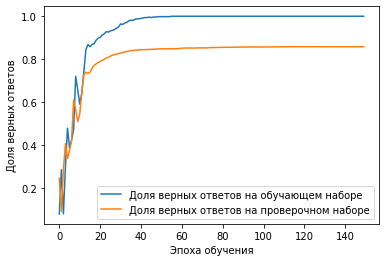

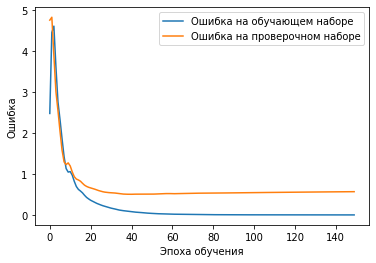

In [ ]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="sigmoid")) # Добавляем полносвязный слой на 800 нейронов с активацией
model.add(Dense(400, activation="sigmoid")) # Добавляем полносвязный слой на 400 нейронов с активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели



#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
history = model.fit(x_train, # массив цифр от 1 до 9 для обучения
                    y_train, # правильные ответы для обучения
                    batch_size=1000,
                    validation_data=(x_test,  # массив цифр от 1 до 9 для проветки
                                     y_test), # правльные ответы для обучения (1-9 цифры)
                    epochs=150,
                    verbose=1)

# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Вывод 500 обуч. на 69 500 тест: loss: 0.0020 < val_loss: 0.5693 / Возникает переобучение, на тестовой базе ошибка увеличивается, на обучающей падает

#2.Создайте еще два варианта сети и сравните значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.

# model1

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_13 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
1/1 [==============================] - 0s 269ms/step - loss: 2.8066 - accuracy: 0.1000 - val_loss: 4.0462 - val_accuracy: 0.4790
Epoch 2/150
1/1 [==============================] - 0s 172ms/step - loss: 3.6789 - accuracy: 0.5300 - val_loss: 5.8196 - val_accuracy: 0.1255
Epoch 3/150
1/1 [==============================] - 0s 172ms/step - loss: 5.9803 - accuracy:

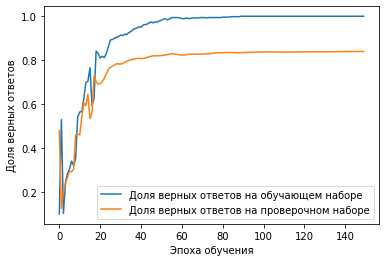

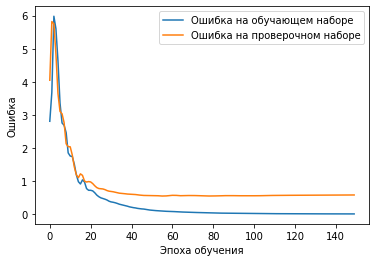

In [ ]:
model1 = Sequential() # Создаём сеть прямого распространения
model1.add(Dense(800, input_dim=784, activation="tanh")) # Добавляем полносвязный слой на 800 нейронов с активацией
model1.add(Dense(400, activation="tanh")) # Добавляем полносвязный слой на 400 нейронов с активацией
model1.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model1.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"]) # Компилируем модель
print(model1.summary()) #Вывод структуры модели



#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
history = model1.fit(x_train, # массив цифр от 1 до 9 для обучения
                    y_train, # правильные ответы для обучения
                    batch_size=1000,
                    validation_data=(x_test,  # массив цифр от 1 до 9 для проветки
                                     y_test), # правльные ответы для обучения (1-9 цифры)
                    epochs=150,
                    verbose=1)

# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Результаты точности с tanh на обучающей accuracy: 1.0000 
                    на проверочной val_accuracy: 0.8398. Вывод 500 примеров она заучила (началось переобучение) и далее начала выдвать 100% точность. На тестовом варианте 83 % точность.

#model2

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_34 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
1/1 [==============================] - 0s 268ms/step - loss: 99.3499 - accuracy: 0.0660 - val_loss: 2127.0696 - val_accuracy: 0.1490
Epoch 2/150
1/1 [==============================] - 0s 176ms/step - loss: 2019.9871 - accuracy: 0.1760 - val_loss: 1386.0898 - val_accuracy: 0.2973
Epoch 3/150
1/1 [==============================] - 0s 181ms/step - loss: 1383.81

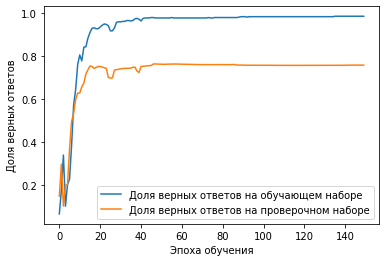

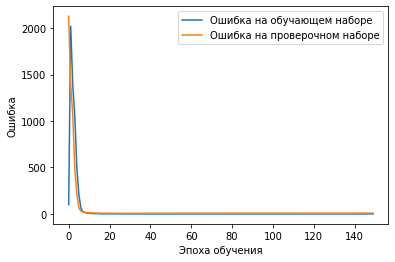

In [ ]:
model2 = Sequential() # Создаём сеть прямого распространения
model2.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с активацией
model2.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с активацией
model2.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model2.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"]) # Компилируем модель
print(model2.summary()) #Вывод структуры модели



#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
history = model2.fit(x_train, # массив цифр от 1 до 9 для обучения
                    y_train, # правильные ответы для обучения
                 
                    batch_size=1000,
                    validation_data=(x_test,  # массив цифр от 1 до 9 для проветки
                                     y_test), # правльные ответы для обучения (1-9 цифры)
                    epochs=150,
                    verbose=1)

# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Используя функцию relu точность далека от 1 -accuracy: 0.9860
                                             val_accuracy: 0.7586 , что гораздо медленее чем с tanh

Создайте сеть следующей архитектуры:
# a. 4 Dense слоя
b. 3 Dropout слоя
c. 3 BatchNormalization слоя

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_43 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_44 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_45 (Dense)             (None, 10)                4010      
Total params: 638,810
Trainable params: 638,810
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
1/1 [==============================] - 0s 296ms/step - loss: 2.6127 - accuracy: 0.0580 - val_loss: 3.7699 - val_accuracy: 0.2221
Epoch 2/150
1/1 [==============================] - 0s 181ms/step - loss: 3.4498 - accuracy: 0.2440 

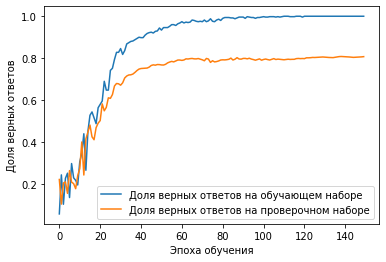

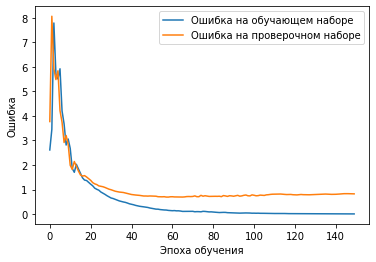

In [ ]:
model_4Dense = Sequential() # Создаём сеть прямого распространения
model_4Dense.add(Dense(400, input_dim=784, activation="tanh")) # Добавляем полносвязный слой на 800 нейронов с активацией
model_4Dense.add(Dense(400, activation="tanh")) # Добавляем полносвязный слой на 400 нейронов с активацией
model_4Dense.add(Dense(400, activation="tanh")) # Добавляем полносвязный слой на 400 нейронов с активацией
model_4Dense.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model_4Dense.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"]) # Компилируем модель
print(model_4Dense.summary()) #Вывод структуры модели



#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
history = model_4Dense.fit(x_train, # массив цифр от 1 до 9 для обучения
                    y_train, # правильные ответы для обучения
                 
                    batch_size=1000,
                    validation_data=(x_test,  # массив цифр от 1 до 9 для проветки
                                     y_test), # правльные ответы для обучения (1-9 цифры)
                    epochs=150,
                    verbose=1)

# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()
plt.show()

1/1 [==============================] - 0s 174ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.8229 - val_accuracy: 0.8075
 Выводы: Возникает сильное преобучение loss: 0.0053 < val_loss: 0.8229. Сеть заучила обучающую выборку. Требуется либо расширить, либо использовать более простую модель сети или др. методы.

Создайте сеть следующей архитектуры:
a. 4 Dense слоя
#b. 3 Dropout слоя
c. 3 BatchNormalization слоя

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 400)               160400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 400)               160400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

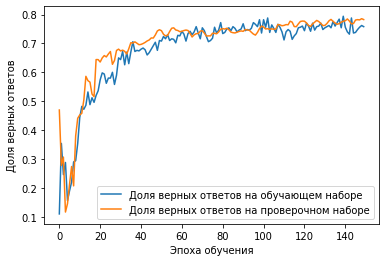

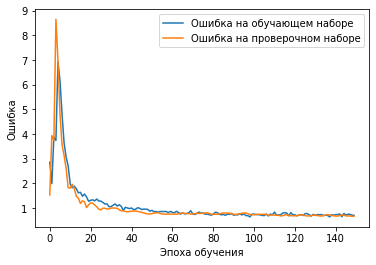

In [ ]:
model_4Dense_3Dropout = Sequential() # Создаём сеть прямого распространения
model_4Dense_3Dropout.add(Dense(400, input_dim=784, activation="tanh")) # Добавляем полносвязный слой на 800 нейронов с активацией
model_4Dense_3Dropout.add(Dropout(0.5))
model_4Dense_3Dropout.add(Dense(400, activation="tanh")) # Добавляем полносвязный слой на 400 нейронов с активацией
model_4Dense_3Dropout.add(Dropout(0.5))
model_4Dense_3Dropout.add(Dense(400, activation="tanh")) # Добавляем полносвязный слой на 400 нейронов с активацией
model_4Dense_3Dropout.add(Dropout(0.5))
model_4Dense_3Dropout.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model_4Dense_3Dropout.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"]) # Компилируем модель
print(model_4Dense_3Dropout.summary()) #Вывод структуры модели



#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
history = model_4Dense_3Dropout.fit(x_train, # массив цифр от 1 до 9 для обучения
                    y_train, # правильные ответы для обучения
                 
                    batch_size=1000,
                    validation_data=(x_test,  # массив цифр от 1 до 9 для проветки
                                     y_test), # правльные ответы для обучения (1-9 цифры)
                    epochs=150,
                    verbose=1)

# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()
plt.show()

1/1 [==============================] - 0s 173ms/step - loss: 0.7052 - accuracy: 0.7580 - val_loss: 0.6806 - val_accuracy: 0.7825
Вывод: Хорошие результаты : переобучения, нет. Точность на проверочной 78% это  даже больше чем на обучающей на 3% (75%). Возможно потребуется добавить количество эпох или увеличить обучающую выборку.

Создайте сеть следующей архитектуры:
a. 4 Dense слоя
b. 3 Dropout слоя
#c. 3 BatchNormalization слоя

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_14 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_27 (Dropout)         (None, 400)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 400)               1600      
_________________________________________________________________
dense_87 (Dense)             (None, 400)               160400    
_________________________________________________________________
dropout_28 (Dropout)         (None, 400)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 400)             

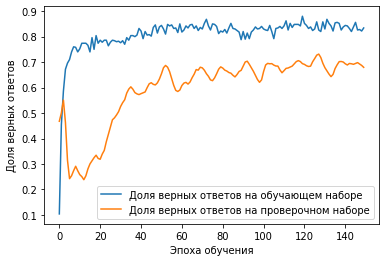

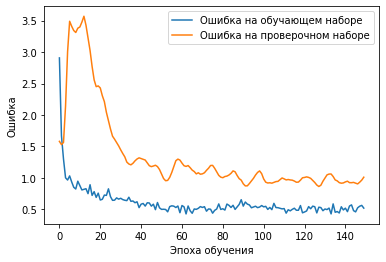

In [ ]:
model_4Dense_3Dropout_3BN = Sequential() # Создаём сеть прямого распространения
model_4Dense_3Dropout_3BN.add(Dense(400, input_dim=784, activation="tanh")) # Добавляем полносвязный слой на 800 нейронов с активацией
model_4Dense_3Dropout_3BN.add(BatchNormalization())

model_4Dense_3Dropout_3BN.add(Dropout(0.5))

model_4Dense_3Dropout_3BN.add(BatchNormalization())
model_4Dense_3Dropout_3BN.add(Dense(400, activation="tanh")) # Добавляем полносвязный слой на 400 нейронов с активацией
model_4Dense_3Dropout_3BN.add(Dropout(0.5))

model_4Dense_3Dropout_3BN.add(BatchNormalization())
model_4Dense_3Dropout_3BN.add(Dense(400, activation="tanh")) # Добавляем полносвязный слой на 400 нейронов с активацией
model_4Dense_3Dropout_3BN.add(Dropout(0.5))


model_4Dense_3Dropout_3BN.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией
model_4Dense_3Dropout_3BN.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"]) # Компилируем модель
print(model_4Dense_3Dropout_3BN.summary()) #Вывод структуры модели



#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
history = model_4Dense_3Dropout_3BN.fit(x_train, # массив цифр от 1 до 9 для обучения
                    y_train, # правильные ответы для обучения
                 
                    batch_size=1000,
                    validation_data=(x_test,  # массив цифр от 1 до 9 для проветки
                                     y_test), # правльные ответы для обучения (1-9 цифры)
                    epochs=150,
                    verbose=1)

# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()
plt.show()

1/1 [==============================] - 0s 221ms/step - loss: 0.5179 - accuracy: 0.8340 - val_loss: 1.0097 - val_accuracy: 0.6794
Выводы используя слой BN - возникло переобучение сети loss: 0.5179 < val_accuracy: 0.6794. Точность на проверочной выборке упала до 68%.

